# **Librerias**

In [1]:
# Importamos 

import scipy
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from scipy import integrate
from scipy.stats import norm, chi2, gamma

# Version 

print(f'Numpy Version: {np.__version__}')
print(f'Scipy Version: {scipy.__version__}')
print(f'Matplotlib Version: {matplotlib.__version__}')

Numpy Version: 2.0.2
Scipy Version: 1.13.1
Matplotlib Version: 3.9.4


# **Valor Esperado**

El valor esperado $E[X]$ es una generalizacion de la media ponderada (Es la media de los posibles valores que puede tomar una Variable Aleatoria $X$ ponderada por la probabilidad de esos resultados)

**$E[X]$ de Variables Aleatorias Discretas:**

$$E[X] = \sum_{i = 1}^n x_{i} \cdot P(X = x_{i})$$

**$E[X]$ de Variables Aleatorias Continuas:**

$$E[X] = \int_{-\infty}^{\infty} x \cdot f(x) \hspace{0.1cm} dx$$

**Propiedades:**

* $E[c] = c$

* $E[c X] = c \cdot E[X]$

* $E[X + Y] = E[X] + E[Y]$

* Si $X \geq 0$ entonces $E[X] \geq 0$ 

* Si $X \leq Y$ entonces $E[X] \leq E[Y]$

* Si $X$ esta delimitada por dos numeros reales $a, b$ entonces $a < E[X] < b$

* Si $X = Y$ entonces $E[X] = E[Y]$

* Si $E[E[X]] = E[X]$ esto ocurre por que el $E[X]$ se comporta como una variable aleatoria

### **Linealidad**

Sabiendo que $X \sim \mathcal{N}(\mu, \sigma^2)$, Definimos una Transformacion Lineal $Y = aX + b$ y calculamos el Valor Esperado $E[Y]$

$$E[Y] = E[aX + b] = E[aX] + E[b] = a \cdot E[X] + b$$

**Nota:** La Distribucion Normal tambien se transforma Linealmente $X \sim \mathcal{N}(\mu, \sigma^2) \longrightarrow Y \sim \mathcal{N}(a \mu + b, a^2 \sigma^2)$

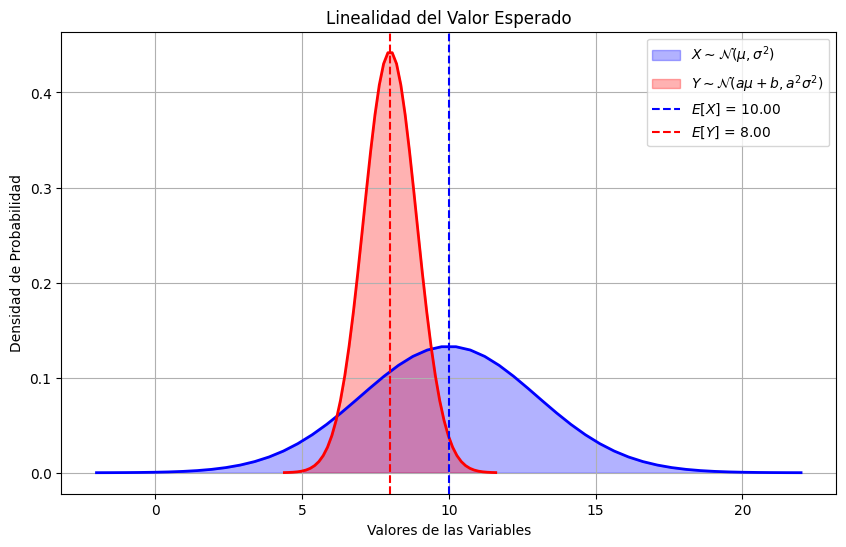

In [2]:
# Definimos la Probabily Density Function de una Variable Aleatoria Normal

mean_x = 10 
std_x = 3

X = np.linspace(start = mean_x - (4 * std_x), stop = mean_x + (4 * std_x))

pdf_values_x = norm.pdf(X, mean_x, std_x)

expected_value_x = mean_x

# Definimos la Probabily Density Function de una Variable Aleatoria Normal Transformada Linealmente (El valor absoluto de a es por sqrt(a^2 \sigma^2))

a = 0.3
b = 5

Y = a * X + b 

pdf_values_y = norm.pdf(Y, a * mean_x + b, abs(a) * std_x)

expected_value_y = a * expected_value_x + b 

# Visualizamos 

fig, axes = plt.subplots(1, 1, figsize = (10, 6))

axes.fill_between(X, pdf_values_x, color = 'blue', alpha = 0.3, label = r"$X \sim \mathcal{N}(\mu, \sigma^2)$")
axes.fill_between(Y, pdf_values_y, color = 'red', alpha = 0.3, label = r"$Y \sim \mathcal{N}(a\mu + b, a^2\sigma^2)$")
axes.plot(X, pdf_values_x, color = 'blue', linewidth = 2)
axes.plot(Y, pdf_values_y, color = 'red', linewidth = 2)
axes.axvline(expected_value_x, color = 'blue', linestyle = 'dashed', label = f'$E[X]$ = {expected_value_x:.2f}')
axes.axvline(expected_value_y, color = 'red', linestyle = 'dashed', label = f'$E[Y]$ = {expected_value_y:.2f}')
axes.set_title("Linealidad del Valor Esperado")
axes.set_xlabel("Valores de las Variables")
axes.set_ylabel("Densidad de Probabilidad")

axes.legend()
axes.grid(True)

plt.show()


### **Suma de Valores Esperados**

Sabiendo que $X \sim \mathcal{N}(\mu_{1}, \sigma_{1}^2)$, $Y \sim \mathcal{N}(\mu_{2}, \sigma_{2}^2)$, Definimos una Variable Aleatoria $Z = X + Y$ y calculamos el Valor Esperado $E[Z]$

**Variables Aleatorias Discretas:**

$$E[X + Y] = \sum_{x} \sum_{y} (x + y) \cdot P(X = x, Y = y)$$

$$E[X + Y] = \sum_{x} \sum_{y} x \cdot P(X = x, Y = y) + \sum_{x} \sum_{y} y \cdot P(X = x, Y = y)$$

$$E[X + Y] = \sum_{x} x \sum_{y} P(X = x, Y = y) + \sum_{y} y \sum_{x} P(X = x, Y = y)$$

$$E[X + Y] = \sum_{x} x \cdot P(X = x) + \sum_{y} y \cdot P(Y = y)$$

$$E[X + Y] = E[X] + E[Y]$$

**Variables Aleatorias Continuas:** 

$$E[X + Y] = \int_{x} \int_{y} (x + y) \cdot f(x, y) \hspace{0.1cm} dx dy$$

$$E[X + Y] = \int_{x} \int_{y} x \cdot f(x, y) \hspace{0.1cm} dx dy + \int_{x} \int_{y} y \cdot f(x, y) \hspace{0.1cm} dx dy$$

$$E[X + Y] = \int_{x} x \int_{y} f(x, y) \hspace{0.1cm} dy dx + \int_{y} y \int_{x} f(x, y) \hspace{0.1cm} dx dy$$

$$E[X + Y] = \int_{x} x \cdot f_{X}(x) \hspace{0.1cm} dx + \int_{y} y \cdot f_{Y}(y) \hspace{0.1cm} dy$$

$$E[X + Y] = E[X] + E[Y]$$

**Puntos Claves:** Estas definiciones de la suma de valores esperados sirve tanto para variables independientes como dependientes 

$$f_{X}(x) = \int_{y} f(x, y) \hspace{0.1cm} dy$$

$$f_{Y}(y) = \int_{x} f(x, y) \hspace{0.1cm} dx$$

**Nota:** La suma de Distribuciones Normales Independientes $X \sim \mathcal{N}(\mu_{1}, \sigma_{1}^2), Y \sim \mathcal{N}(\mu_{2}, \sigma_{2}^2)  \longrightarrow X+Y \sim \mathcal{N}(\mu_{1} + \mu_{2}, \sigma_{1}^2 + \sigma_{2}^2)$

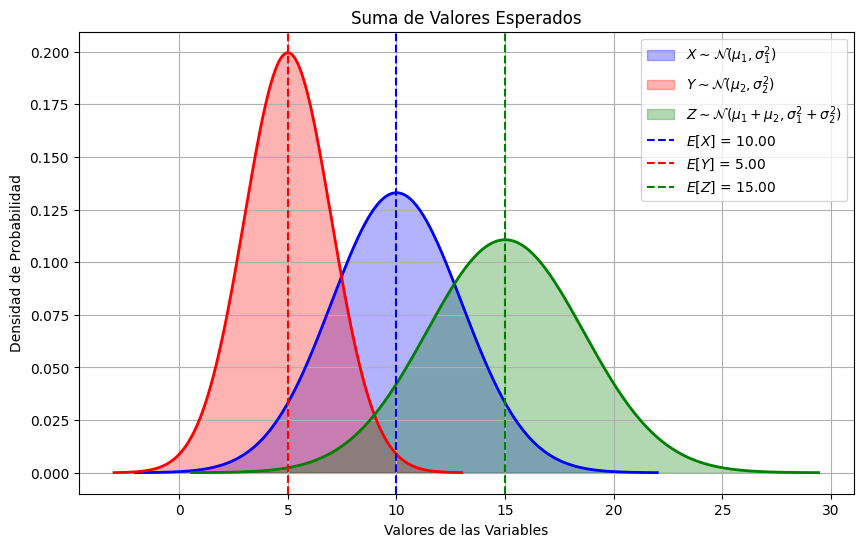

In [3]:
# Definimos la Probabily Density Function de dos Variables Aleatorias Normales

mean_x = 10
std_x = 3

mean_y = 5
std_y = 2

X = np.linspace(start = mean_x - (4 * std_x), stop = mean_x + (4 * std_x), num = 500)
Y = np.linspace(start = mean_y - (4 * std_y), stop = mean_y + (4 * std_y), num = 500)

pdf_values_x = norm.pdf(X, mean_x, std_x)
pdf_values_y = norm.pdf(Y, mean_y, std_y)

expected_value_x = mean_x
expected_value_y = mean_y

# Definimos la Probabily Density Function de la suma de Dos Variables Aleatorias Normales (sqrt(std_x^2 + std_y^2) es distinto a (std_x + std_y))

Z = np.linspace(start = (mean_x + mean_y) - (4 * np.sqrt(std_x**2 + std_y**2)), stop = (mean_x + mean_y) + (4 * np.sqrt(std_x**2 + std_y**2)), num = 500)

pdf_values_z = norm.pdf(Z, mean_x + mean_y, np.sqrt(std_x**2 + std_y**2))

expected_value_z = expected_value_x + expected_value_y

# Visualizamos 

fig, axes = plt.subplots(1, 1, figsize = (10, 6))

axes.fill_between(X, pdf_values_x, color = 'blue', alpha = 0.3, label = r"$X \sim \mathcal{N}(\mu_1, \sigma_1^2)$")
axes.fill_between(Y, pdf_values_y, color = 'red', alpha = 0.3, label = r"$Y \sim \mathcal{N}(\mu_2, \sigma_2^2)$")
axes.fill_between(Z, pdf_values_z, color = 'green', alpha = 0.3, label = r"$Z \sim \mathcal{N}(\mu_1 + \mu_2, \sigma_1^2 + \sigma_2^2)$")
axes.plot(X, pdf_values_x, color = 'blue', linewidth = 2)
axes.plot(Y, pdf_values_y, color = 'red', linewidth = 2)
axes.plot(Z, pdf_values_z, color = 'green', linewidth = 2)
axes.axvline(expected_value_x, color = 'blue', linestyle = 'dashed', label = f'$E[X]$ = {expected_value_x:.2f}')
axes.axvline(expected_value_y, color = 'red', linestyle = 'dashed', label = f'$E[Y]$ = {expected_value_y:.2f}')
axes.axvline(expected_value_z, color = 'green', linestyle = 'dashed', label = f'$E[Z]$ = {expected_value_z:.2f}')
axes.set_title("Suma de Valores Esperados")
axes.set_xlabel("Valores de las Variables")
axes.set_ylabel("Densidad de Probabilidad")

axes.legend()
axes.grid(True)

plt.show()


### **Estadistico Inconsciente**

Sabiendo que $X \sim \mathcal{N}(0, 1)$ y adicionalmente tenemos algun tipo de funcion $g(X) = X^2$, calculamos el Valor Esperado $E[g(X)]$ 

**$E[g(X)]$ de Variables Aleatorias Discretas:**

$$E[g(X)] = \sum_{i = 1}^n g(x_{i}) \cdot P(X = x_{i})$$

$$E[X^2] = \sum_{i = 1}^n x_{i}^2 \cdot P(X = x_{i})$$

**$E[g(X)]$ de Variables Aleatorias Continuas:**

$$E[g(X)] = \int_{-\infty}^{\infty} g(x) \cdot f(x) \hspace{0.1cm} dx$$

$$E[X^2] = \int_{-\infty}^{\infty} x^2 \cdot f(x) \hspace{0.1cm} dx$$

**Nota:** Se aplica la Funcion $g(X)$ a la Distribucion Normal $X \sim \mathcal{N}(0, 1) \longrightarrow X^2 \sim \chi^2(1)$

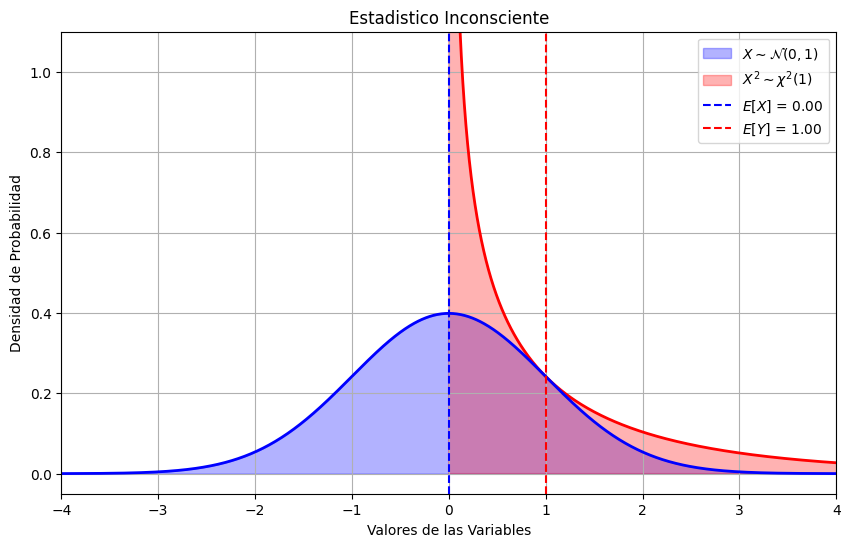

In [4]:
# Definimos la Probabily Density Function de una Variable Aleatoria Normal

mean_x = 0
std_x = 1

X = np.linspace(start = -4, stop = 4, num = 1000)

pdf_values_x = norm.pdf(X, mean_x, std_x)

expected_value_x, _ = integrate.quad(lambda x: x * norm.pdf(x, mean_x, std_x), a = -np.inf, b = np.inf)

# Definimos la Probabily Density Function de una Variable Aleatoria Normal Transformada por la Funcion (Se transfoma a una distribucion chi-cuadrado con un grado de libertad) (X solo puede ser positivo por eso existe X_chi)

liberty = 1

X_chi = np.linspace(start = 0, stop = 4, num = 1000)
Y = X_chi**2

pdf_values_y = chi2.pdf(Y, df = liberty)

expected_value_y, _ = integrate.quad(lambda y: y * chi2.pdf(y, df = liberty), a = 0, b = np.inf)

# Visualizamos 

fig, axes = plt.subplots(1, 1, figsize = (10, 6))

axes.fill_between(X, pdf_values_x, color = 'blue', alpha = 0.3, label = r"$X \sim \mathcal{N}(0, 1)$")
axes.fill_between(Y, pdf_values_y, color = 'red', alpha = 0.3, label = r"$X^2 \sim \chi^2(1)$")
axes.plot(Y, pdf_values_y, color = 'red', linewidth = 2)
axes.plot(X, pdf_values_x, color = 'blue', linewidth = 2)
axes.axvline(expected_value_x, color = 'blue', linestyle = 'dashed', label = f'$E[X]$ = {expected_value_x:.2f}')
axes.axvline(expected_value_y, color = 'red', linestyle = 'dashed', label = f'$E[Y]$ = {expected_value_y:.2f}')
axes.set_title("Estadistico Inconsciente")
axes.set_xlabel("Valores de las Variables")
axes.set_ylabel("Densidad de Probabilidad")

axes.legend()
axes.grid(True)
axes.set_xlim(-4, 4)
axes.set_ylim(-0.05, 1.1)

plt.show()

# **Momentos**

El momento es una medida cuantitativa relacionada con la forma de la distribucion de una Variable Aleatoria $X$

**Momentos Sin Centrar** 

$$\mu_{n}' = E[X^n]$$

**Momentos Centrados**

$$\mu_{n} = E[(X - \mu)^n]$$

**Momentos Estandarizados** 

$$\frac{\mu_{n}}{\sigma^{n}} = \frac{E[(X - \mu)^n]}{\sigma^n} = \frac{E[(X - \mu)^n]}{E[(X - \mu)^2]^\frac{n}{2}}$$

**Momento de Primer Orden:**

* Sin Centrar  (Media) = $E[X]$ 
* Centrado = $0$
* Estandarizado = $0$

**Momento de Segundo Orden:**

* Centrado (Varianza) = $E[X^2] - E[X]^2$
* Estandarizado = $1$ 

**Momento de Tercer Orden:**

* Estandarizado (Asimetria) = $\gamma_{1}$ 

**Momento de Cuarto Orden:**

* Estandarizado (Curtosis) = $\gamma_{2} - 3$ 

### **Momento de Primer Orden** 

Sabiendo que $X \sim \Gamma(\alpha, \lambda)$

**Sin Centrar (Media):** 

$$\mu_{1}' = E[X^n] = E[X^1] = E[X]$$

**Centrado:** 

$$\mu_{1} = E[(X - \mu)^n] = E[(X - \mu)^1] = E[X] - E[\mu] = E[X] - \mu = E[X] - E[X] = 0$$

**Estandarizado** 

$$\frac{\mu_{1}}{\sigma^{1}} = \frac{E[(X - \mu)^n]}{\sigma^n} = \frac{E[(X - \mu)^1]}{\sigma^1} = \frac{E[X] - E[\mu]}{\sigma} = \frac{E[X] - \mu}{\sigma} = \frac{E[X] - E[X]}{\sigma} = \frac{0}{\sigma} = 0$$

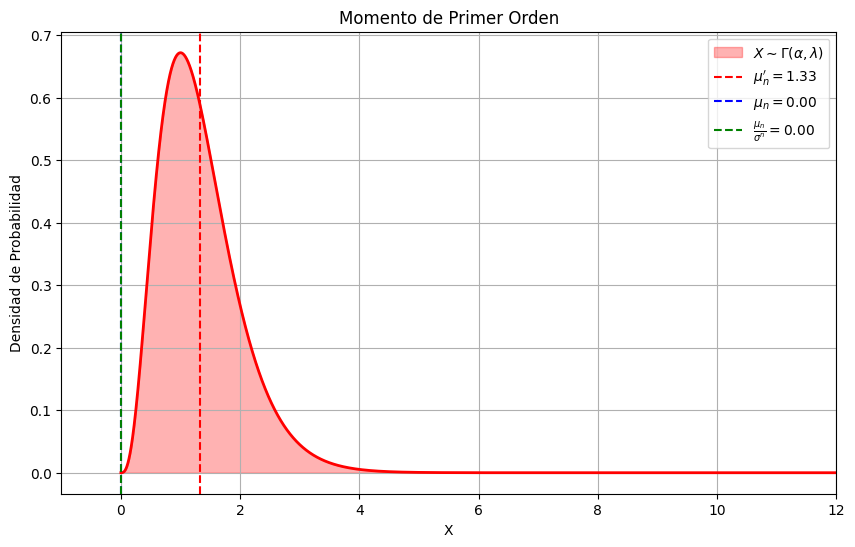

In [5]:
# Parametros de Nuestra Variable Aleatoria Gamma

alpha_value = 4
gamma_value = 3

mean = alpha_value / gamma_value 
std = np.sqrt(alpha_value / gamma_value**2)

X = np.linspace(start = 0, stop = 12, num = 10000)

probablity_density_function = gamma.pdf(X, alpha_value, scale = 1/gamma_value)

# Momento de Primer Orden Sin Centrar (Media)

moment_raw, _ = integrate.quad(lambda x: x * gamma.pdf(x, alpha_value, scale = 1/gamma_value), a = 0, b = np.inf)

# Momento de Primer Orden Centrado

moment_center, _ = integrate.quad(lambda x: (x - mean) * gamma.pdf(x, alpha_value, scale = 1/gamma_value), a = 0, b = np.inf)

# Momento de Primer Orden Estandarizado

moment_standarize, _ = integrate.quad(lambda x: ((x - mean) / std) * gamma.pdf(x, alpha_value, scale = 1/gamma_value), a = 0, b = np.inf)

# Visualizamos 

fig, axes = plt.subplots(1, 1, figsize = (10, 6))

axes.fill_between(X, probablity_density_function, color = 'red', alpha = 0.3, label = r"$X \sim \Gamma(\alpha, \lambda)$")
axes.plot(X, probablity_density_function, color = 'red', linewidth = 2)
axes.axvline(moment_raw, color = 'red', linestyle = 'dashed', label = rf"$\mu_{{n}}' = {moment_raw:.2f}$")
axes.axvline(moment_center, color = 'blue', linestyle = 'dashed', label = rf"$\mu_{{n}} = {moment_center:.2f}$")
axes.axvline(moment_standarize, color = 'green', linestyle = 'dashed', label = rf'$\frac{{\mu_{{n}}}}{{\sigma^n}} = {moment_standarize:.2f}$')
axes.set_title("Momento de Primer Orden")
axes.set_xlabel("X")
axes.set_ylabel("Densidad de Probabilidad")

axes.legend()
axes.grid(True)
axes.set_xlim(-1, 12)

plt.show()

### **Momento de Segundo Orden** 

Sabiendo que $X \sim \Gamma(\alpha, \lambda)$

**Centrado (Varianza):** 

$$\mu_{2} = E[(X - \mu)^n] = E[(X - \mu)^2]$$
$$\mu_{2} = E[X^2 - 2X\mu + \mu^2]$$ 
$$\mu_{2} = E[X^2] - E[2X\mu] + E[\mu^2]$$
$$\mu_{2} = E[X^2] - 2\mu \cdot E[X] + \mu^2$$
$$\mu_{2} = E[X^2] - 2E[X] \cdot E[X] + E[X]^2$$
$$\mu_{2} = E[X^2] - 2E[X]^2 + E[X]^2$$ 
$$\mu_{2} = E[X^2] - E[X]^2$$


**Estandarizado** 

$$\frac{\mu_{2}}{\sigma^2} = \frac{\mu_{n}}{\sigma^n} = \frac{E[(X - \mu)^n]}{\sigma^n} = \frac{E[(X - \mu)^2]}{\sigma^2}$$
$$\frac{\mu_{2}}{\sigma^2}  = \frac{E[X^2 - 2X\mu + \mu^2]}{\sigma^2}$$
$$\frac{\mu_{2}}{\sigma^2}  = \frac{E[X^2] - E[2X\mu] + E[\mu^2]}{\sigma^2}$$
$$\frac{\mu_{2}}{\sigma^2}  = \frac{E[X^2] - 2\mu \cdot E[X] + \mu^2}{\sigma^2}$$
$$\frac{\mu_{2}}{\sigma^2}  = \frac{E[X^2] - 2E[X] \cdot E[X] + E[X]^2}{\sigma^2}$$
$$\frac{\mu_{2}}{\sigma^2}  = \frac{E[X^2] - 2E[X]^2 + E[X]^2}{\sigma^2}$$
$$\frac{\mu_{2}}{\sigma^2}  = \frac{E[X^2] - E[X]^2}{\sigma^2}$$
$$\frac{\mu_{2}}{\sigma^2}  = \frac{E[X^2] - E[X]^2}{E[X^2] - E[X]^2}$$
$$\frac{\mu_{2}}{\sigma^2}  = 1$$

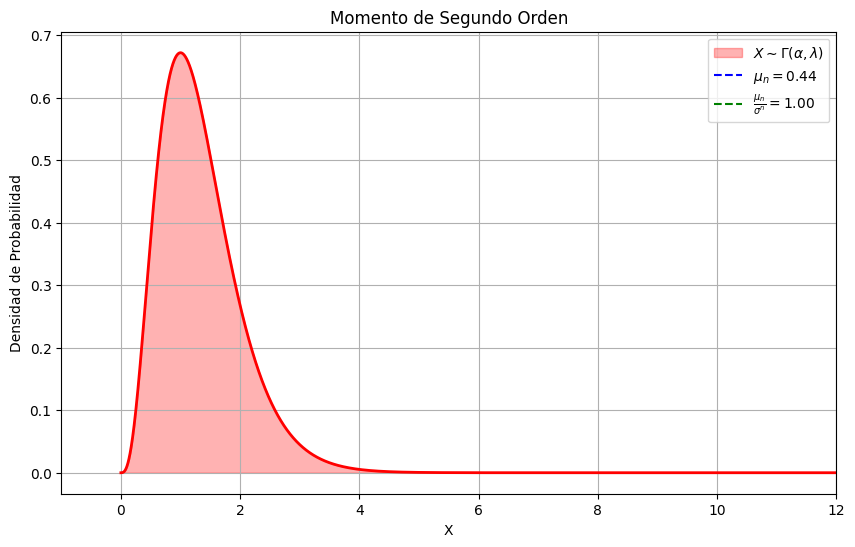

In [6]:
# Parametros de Nuestra Variable Aleatoria Gamma

alpha_value = 4
gamma_value = 3

mean = alpha_value / gamma_value 
std = np.sqrt(alpha_value / gamma_value**2)

X = np.linspace(start = 0, stop = 12, num = 10000)

probablity_density_function = gamma.pdf(X, alpha_value, scale = 1/gamma_value)

# Momento de Segundo Orden Centrado (Varianza)

moment_center, _ = integrate.quad(lambda x: (x - mean)**2 * gamma.pdf(x, alpha_value, scale = 1/gamma_value), a = 0, b = np.inf)

# Momento de Segundo Orden Estandarizado

moment_standarize, _ = integrate.quad(lambda x: ((x - mean)**2 / std**2) * gamma.pdf(x, alpha_value, scale = 1/gamma_value), a = 0, b = np.inf)

# Visualizamos 

fig, axes = plt.subplots(1, 1, figsize = (10, 6))

axes.fill_between(X, probablity_density_function, color = 'red', alpha = 0.3, label = r"$X \sim \Gamma(\alpha, \lambda)$")
axes.plot(X, probablity_density_function, color = 'red', linewidth = 2)
axes.axvline(-100000, color = 'blue', linestyle = 'dashed', label = rf"$\mu_{{n}} = {moment_center:.2f}$")
axes.axvline(-100000, color = 'green', linestyle = 'dashed', label = rf'$\frac{{\mu_{{n}}}}{{\sigma^n}} = {moment_standarize:.2f}$')
axes.set_title("Momento de Segundo Orden")
axes.set_xlabel("X")
axes.set_ylabel("Densidad de Probabilidad")

axes.legend()
axes.grid(True)
axes.set_xlim(-1, 12)

plt.show()

### **Momento de Tercer Orden** 

Sabiendo que $X \sim \Gamma(\alpha, \lambda)$

**Estandarizado (Asimetria)**

$$\frac{\mu_{3}}{\sigma^3} = \frac{\mu_{n}}{\sigma^n} = \frac{E[(X - \mu)^n]}{\sigma^n} = \frac{E[(X - \mu)^3]}{\sigma^3}$$
$$\frac{\mu_{3}}{\sigma^3}  = \frac{E[X^3 - 3X^2\mu + 3X\mu^2 - \mu^3]}{\sigma^3}$$
$$\frac{\mu_{3}}{\sigma^3}  = \frac{E[X^3] - E[3X^2\mu] + E[3X\mu^2] - E[\mu^3]}{\sigma^3}$$
$$\frac{\mu_{3}}{\sigma^3}  = \frac{E[X^3] - 3\mu E[X^2] + 3\mu^2 E[X] - \mu^3}{\sigma^3}$$
$$\frac{\mu_{3}}{\sigma^3}  = \frac{E[X^3] - 3E[X] E[X^2] + 3E[X]^2 \cdot E[X] - E[X]^3}{\sigma^3}$$
$$\frac{\mu_{3}}{\sigma^3}  = \frac{E[X^3] - 3E[X] E[X^2] + 3E[X]^3 - E[X]^3}{\sigma^3}$$
$$\frac{\mu_{3}}{\sigma^3}  = \frac{E[X^3] - 3E[X] \cdot E[X^2] + 2E[X]^3}{\sigma^3}$$
$$\gamma_{1}  = \frac{E[X^3] - 3E[X] \cdot E[X^2] + 2E[X]^3}{\sigma^3}$$


**Notas:** 

* $\gamma_{1} = 0$: Indica una Distribucion Simetrica
* $\gamma_{1} < 0$: Indica una Distribucion con una Cola mas Larga a la Izquierda
* $\gamma_{1} > 0$: Indica una Distribucion con una Cola mas Larga a la Derecha

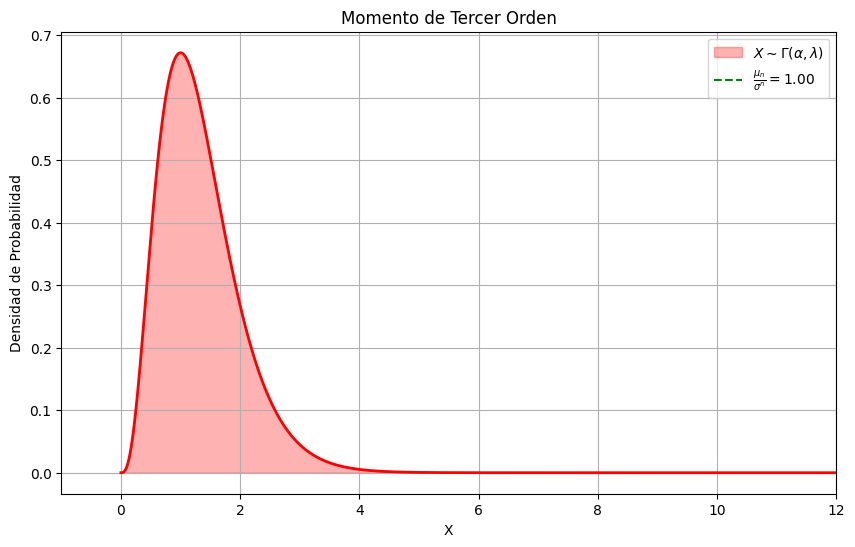

In [7]:
# Parametros de Nuestra Variable Aleatoria Gamma

alpha_value = 4
gamma_value = 3

mean = alpha_value / gamma_value 
std = np.sqrt(alpha_value / gamma_value**2)

X = np.linspace(start = 0, stop = 12, num = 10000)

probablity_density_function = gamma.pdf(X, alpha_value, scale = 1/gamma_value)

# Momento de Tercer Orden Estandarizado (Aimetria)

moment_standarize, _ = integrate.quad(lambda x: ((x - mean)**3 / std**3) * gamma.pdf(x, alpha_value, scale = 1/gamma_value), a = 0, b = np.inf)

# Visualizamos 

fig, axes = plt.subplots(1, 1, figsize = (10, 6))

axes.fill_between(X, probablity_density_function, color = 'red', alpha = 0.3, label = r"$X \sim \Gamma(\alpha, \lambda)$")
axes.plot(X, probablity_density_function, color = 'red', linewidth = 2)
axes.axvline(-100000, color = 'green', linestyle = 'dashed', label = rf'$\frac{{\mu_{{n}}}}{{\sigma^n}} = {moment_standarize:.2f}$')
axes.set_title("Momento de Tercer Orden")
axes.set_xlabel("X")
axes.set_ylabel("Densidad de Probabilidad")

axes.legend()
axes.grid(True)
axes.set_xlim(-1, 12)

plt.show()

### **Momento de Cuarto Orden** 

Sabiendo que $X \sim \Gamma(\alpha, \lambda)$

**Estandarizado (Curtosis)**

$$\frac{\mu_{4}}{\sigma^4} = \frac{\mu_{n}}{\sigma^n} = \frac{E[(X - \mu)^n]}{\sigma^n} = \frac{E[(X - \mu)^4]}{\sigma^4}$$
$$\frac{\mu_{4}}{\sigma^4}  = \frac{E[X^4 - 4X^3\mu + 6X^2\mu^2 - 4X\mu^3 + \mu^4]}{\sigma^4}$$
$$\frac{\mu_{4}}{\sigma^4}  = \frac{E[X^4] - E[4X^3\mu] + E[6X^2\mu^2] - E[4X\mu^3] + E[X]^4}{\sigma^4}$$
$$\frac{\mu_{4}}{\sigma^4}  = \frac{E[X^4] - 4\mu \cdot E[X^3] + 6\mu^2 \cdot E[X^2] - 4\mu^3 \cdot E[X] + E[X]^4}{\sigma^4}$$
$$\frac{\mu_{4}}{\sigma^4}  = \frac{E[X^4] - 4E[X] \cdot E[X^3] + 6E[X]^2 \cdot E[X^2] - 4E[X]^3 \cdot E[X] + E[X]^4}{\sigma^4}$$
$$\frac{\mu_{4}}{\sigma^4}  = \frac{E[X^4] - 4E[X] \cdot E[X^3] + 6E[X]^2 \cdot E[X^2] - 4E[X]^4 + E[X]^4}{\sigma^4}$$
$$\frac{\mu_{4}}{\sigma^4}  = \frac{E[X^4] - 4E[X] \cdot E[X^3] + 6E[X]^2 \cdot E[X^2] - 3E[X]^4}{\sigma^4}$$
$$\gamma_{2} = \frac{E[X^4] - 4E[X] \cdot E[X^3] + 6E[X]^2 \cdot E[X^2] - 3E[X]^4}{\sigma^4} - 3$$
$$\gamma_{2} = \frac{\mu_{4}}{\sigma^4} - 3$$

**Notas:** 

* $\gamma_{2} = 3$: La Distribucion tiene la Misma Curtosis que la Normal (Mesocúrtica)
* $\gamma_{2} < 3$: La Distribucion tiene colas mas ligeras (Platucúrtica)
* $\gamma_{2} > 3$: La Distribucion tiene colas mas Pesadas (Leptocúrtica)


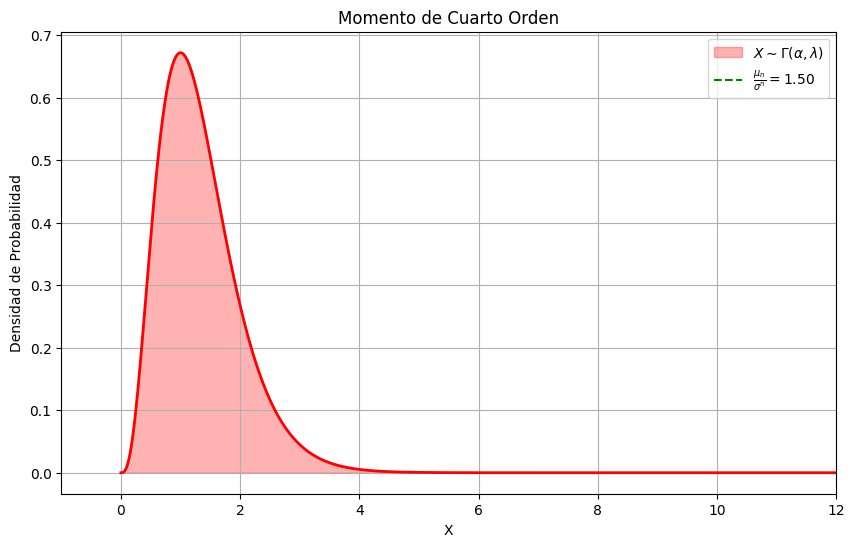

In [8]:
# Parametros de Nuestra Variable Aleatoria Gamma

alpha_value = 4
gamma_value = 3

mean = alpha_value / gamma_value 
std = np.sqrt(alpha_value / gamma_value**2)

X = np.linspace(start = 0, stop = 12, num = 10000)

probablity_density_function = gamma.pdf(X, alpha_value, scale = 1/gamma_value)

# Momento de Cuarto Orden Estandarizado (Curtosis)

moment_standarize, _ = integrate.quad(lambda x: ((x - mean)**4 / std**4) * gamma.pdf(x, alpha_value, scale = 1/gamma_value), a = 0, b = np.inf)
moment_standarize = moment_standarize - 3

# Visualizamos 

fig, axes = plt.subplots(1, 1, figsize = (10, 6))

axes.fill_between(X, probablity_density_function, color = 'red', alpha = 0.3, label = r"$X \sim \Gamma(\alpha, \lambda)$")
axes.plot(X, probablity_density_function, color = 'red', linewidth = 2)
axes.axvline(-100000, color = 'green', linestyle = 'dashed', label = rf'$\frac{{\mu_{{n}}}}{{\sigma^n}} = {moment_standarize:.2f}$')
axes.set_title("Momento de Cuarto Orden")
axes.set_xlabel("X")
axes.set_ylabel("Densidad de Probabilidad")

axes.legend()
axes.grid(True)
axes.set_xlim(-1, 12)

plt.show()